# Coursework

wdcwce

In [1]:
import os 
from os import chdir
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve
from seaborn import heatmap

/var/folders/gb/vdt0br0552gdrvs5h91t32dh0000gn/T/ipykernel_90184/3986215659.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data = pd.read_csv(training_file, header=0, na_values=['?'])


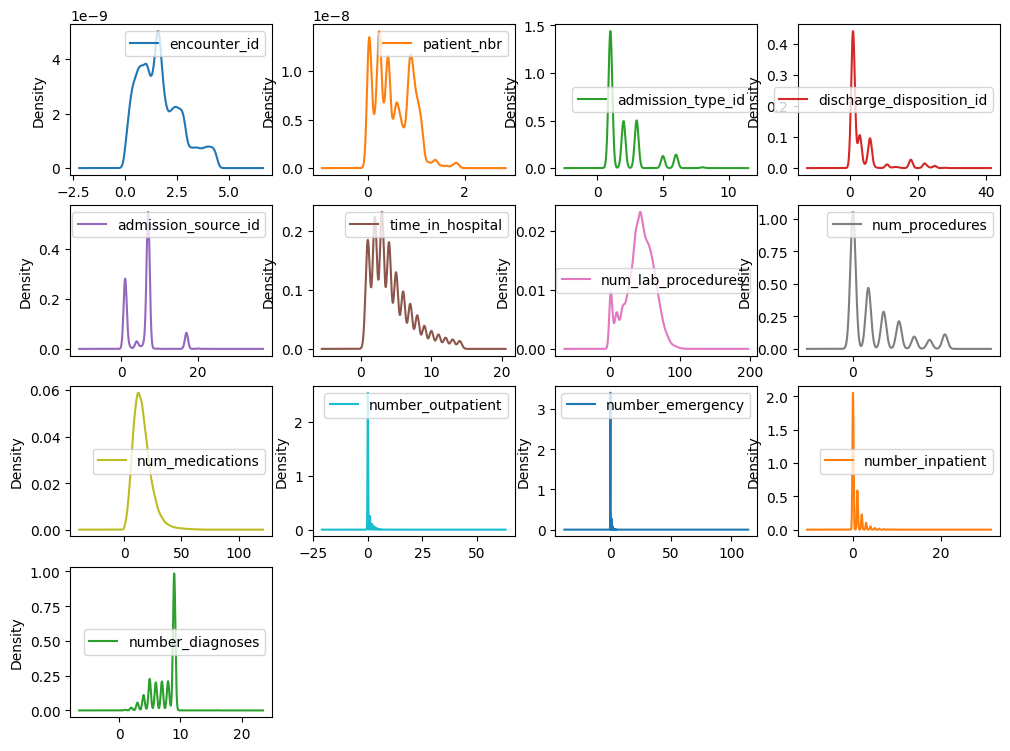

In [34]:
training_file = './Dataset/diabetic_data_training.csv'
training_data = pd.read_csv(training_file, header=0, na_values=['?'])
training_data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12, 9))
plt.show()

In [36]:
training_file = './Dataset/diabetic_data_training.csv'
test_file_path = './Dataset/diabetic_data_test.csv'

training_data = pd.read_csv(training_file, header=0, na_values=['?'])
training_data = training_data.drop(columns=['encounter_id', 'patient_nbr'])

missing_percentage = training_data.isnull().mean()
columns_to_drop = training_data.columns[missing_percentage > 0.5]
print(columns_to_drop)
training_data = training_data.loc[:, missing_percentage < 0.5]
training_data = training_data.apply(
    lambda col: col.fillna(col.mean()) if col.isnull().any() and col.dtype in ['float64', 'int64'] else col
)

print(len(training_data.columns))


testing_data = pd.read_csv(test_file_path, header=0, na_values=['?'])
testing_data = testing_data.drop(columns=['encounter_id', 'patient_nbr'])
testing_data = testing_data.drop(columns=columns_to_drop, errors='ignore')

for col in training_data.columns:
    if col in testing_data.columns and testing_data[col].isnull().any():
        if training_data[col].dtype in ['float64', 'int64']:
            # Use the mean from training data
            mean_value = training_data[col].mean()
            testing_data[col] = testing_data[col].fillna(mean_value)

testing_data = testing_data.reindex(columns=training_data.columns, fill_value=0)
X_train , y_train = training_data.drop("readmitted", axis=1), training_data["readmitted"].copy()
X_test, y_test = testing_data.drop("readmitted", axis=1), testing_data["readmitted"]




/var/folders/gb/vdt0br0552gdrvs5h91t32dh0000gn/T/ipykernel_90184/386709807.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data = pd.read_csv(training_file, header=0, na_values=['?'])


Index(['weight', 'max_glu_serum', 'A1Cresult'], dtype='object')
45
